In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('/home/ac/IPM_MPNN/results.csv')

# Filter the DataFrame to remove rows with obj_gap > 2000
#df_filtered = df[df['obj_gap'] <= 2000]
#df_filtered = df
#df_filtered = df[(df['problem'] == 'Cauctions')] #& (df['obj_gap'] <= 2000)]

# Create a plot
plt.figure(figsize=(10, 6))

# Get unique problem types
problem_types = df_filtered['problem'].unique()

# Define a color map
colors = plt.cm.get_cmap('tab10', len(problem_types))

# Plot data for each problem type with different colors
for i, problem in enumerate(problem_types):
    problem_data = df_filtered[df_filtered['problem'] == problem]
    plt.scatter(problem_data['no_of_file'], problem_data['obj_gap'], color=colors(i), label=problem)

# Add titles and labels
plt.title('Objective Gap vs Number of Files for Different Problem Types')
plt.xlabel('Number of Files')
plt.ylabel('Objective Gap')
plt.grid(True)
plt.legend(title="Problem Type")
plt.show()

NameError: name 'df_filtered' is not defined

<Figure size 1000x600 with 0 Axes>

/tmp/ipykernel_2068228/3163600405.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(problem_types))


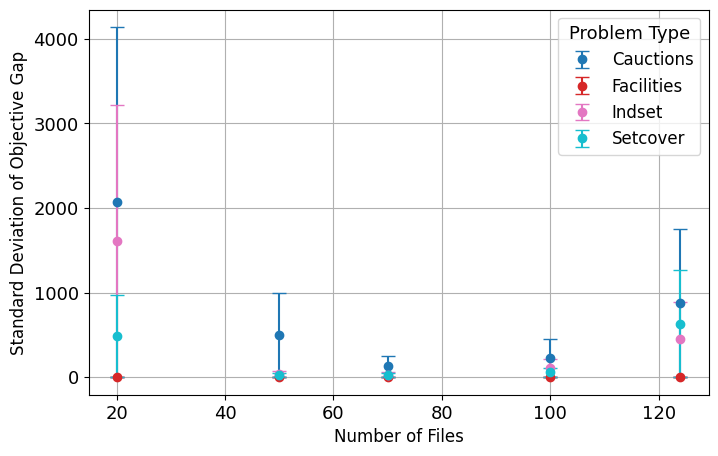

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('/home/ac/IPM_MPNN/results.csv')

df_filtered = df
# Calculate the standard deviation of obj_gap for each no_of_file and problem type
std_dev = df_filtered.groupby(['no_of_file', 'problem'])['obj_gap'].std().reset_index()

# Create a plot with a smaller figure size
plt.figure(figsize=(8, 5))  # Adjusted to make the image smaller

# Get unique problem types
problem_types = std_dev['problem'].unique()

# Define a color map
colors = plt.cm.get_cmap('tab10', len(problem_types))

# Plot standard deviation for each problem type
for i, problem in enumerate(problem_types):
    problem_data = std_dev[std_dev['problem'] == problem]
    plt.errorbar(problem_data['no_of_file'], problem_data['obj_gap'], 
                 yerr=problem_data['obj_gap'], 
                 fmt='o', 
                 color=colors(i), 
                 label=problem, 
                 capsize=5, 
                 linestyle='None')

# Add titles and labels with increased font sizes
plt.xlabel('Number of Files', fontsize=12)
plt.ylabel('Standard Deviation of Objective Gap', fontsize=12)

# Adjust tick parameters to increase font size of tick labels
plt.tick_params(axis='both', labelsize=13)  # Adjust the label size here

plt.grid(True)
plt.legend(title="Problem Type", fontsize=12, title_fontsize=13)  # Increase legend text size
plt.show()


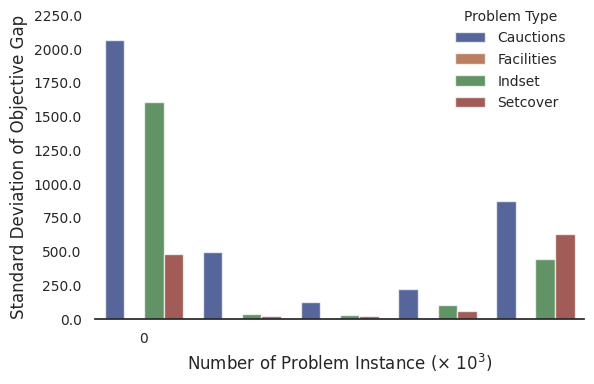

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('/home/ac/IPM_MPNN/results.csv')

# Calculate the standard deviation of obj_gap for each no_of_file and problem type
std_dev = df.groupby(['no_of_file', 'problem'])['obj_gap'].std().reset_index()

# Set the theme for the plot with minimalistic styling
sns.set_theme(style="white")

# Create a nested barplot with a more compact horizontal layout
g = sns.catplot(
    data=std_dev, kind="bar",
    x="no_of_file", y="obj_gap", hue="problem",
    errorbar=None,  # Disable error bars for clarity
    palette="dark", alpha=0.7, height=4, aspect=1.2  # Adjusted aspect for horizontal compactness
)

# Customize the plot
g.despine(left=True)
g.set_axis_labels("Number of Problem Instance (× $10^3$)", "Standard Deviation of Objective Gap", fontsize=12)
g.legend.set_title("Problem Type")
g.legend.get_title().set_fontsize(10)

# Adjust the font size of all legend labels
for text in g.legend.get_texts():
    text.set_fontsize(10)

g.set_titles("Standard Deviation of Objective Gap by Number of Files and Problem Type")

# Set x-ticks to increment by 500
x_ticks = np.arange(0, std_dev['no_of_file'].max() + 1, 500)
g.set(xticks=x_ticks)

# Adjust tick label sizes for compactness
g.set_xticklabels(g.ax.get_xticks(), fontsize=10)
g.set_yticklabels(g.ax.get_yticks(), fontsize=10)

# Move the legend to the top-right corner
g.legend.set_bbox_to_anchor((0.95, 0.81))
g.legend.set_frame_on(False)  # Optional: Removes the legend box for a cleaner look

# Tighten the layout
plt.tight_layout()

# Save the plot
plt.savefig('/home/ac/IPM_MPNN/standard_deviation_plot.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_4192911/542082712.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(problem_types))


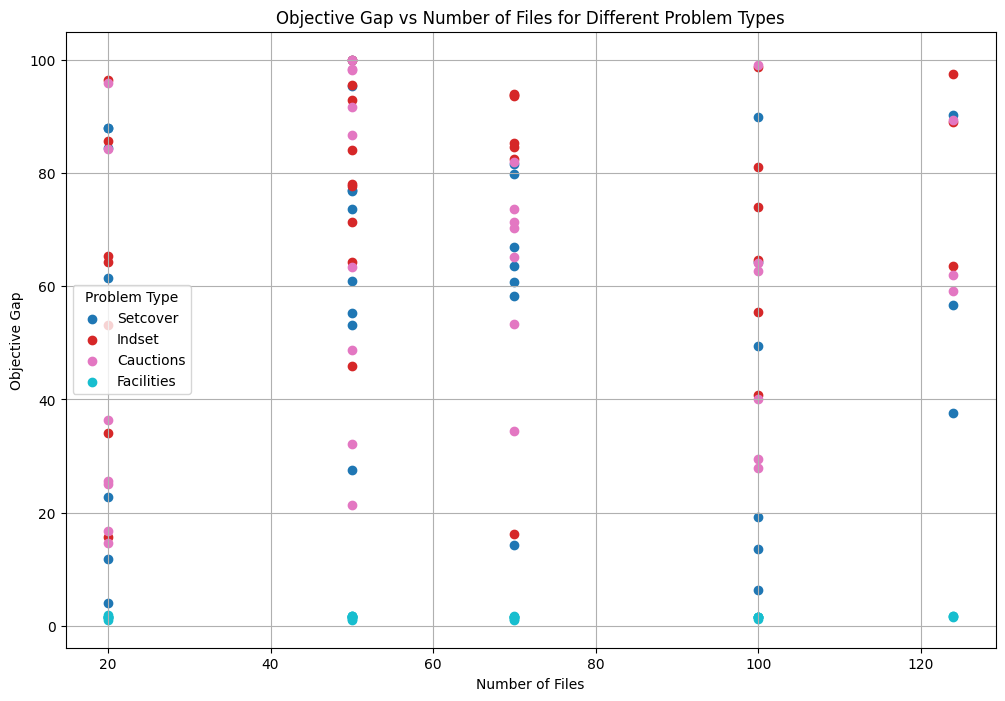

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('/home/ac/IPM_MPNN/results.csv')

# Step 1: Identify (no_of_file, run) combinations where any problem type has obj_gap > 50
invalid_runs = df[df['obj_gap'] > 100][['no_of_file', 'run']].drop_duplicates()

# Get the list of (no_of_file, run) tuples to exclude
invalid_run_tuples = list(invalid_runs.itertuples(index=False, name=None))

# Step 2: Filter out these (no_of_file, run) combinations
df_filtered = df[~df[['no_of_file', 'run']].apply(tuple, axis=1).isin(invalid_run_tuples)]

# Plotting the results
plt.figure(figsize=(12, 8))

# Get unique problem types
problem_types = df_filtered['problem'].unique()

# Define a color map
colors = plt.cm.get_cmap('tab10', len(problem_types))

# Plot data for each problem type with different colors
for i, problem in enumerate(problem_types):
    problem_data = df_filtered[df_filtered['problem'] == problem]
    plt.scatter(problem_data['no_of_file'], problem_data['obj_gap'], 
                color=colors(i), 
                label=problem)

# Add titles and labels
plt.title('Objective Gap vs Number of Files for Different Problem Types')
plt.xlabel('Number of Files')
plt.ylabel('Objective Gap')
plt.grid(True)
plt.legend(title="Problem Type")
plt.show()

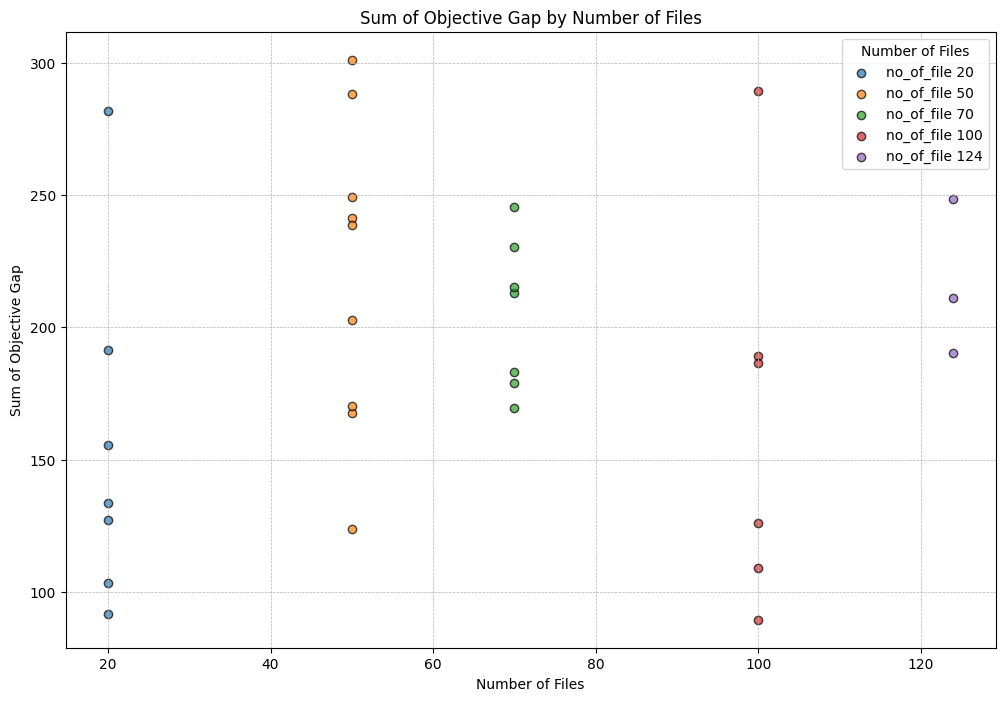

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
df = pd.read_csv('/home/ac/IPM_MPNN/results.csv')

# Step 1: Identify (no_of_file, run) combinations where any problem type has obj_gap > 100
invalid_runs = df[df['obj_gap'] > 100][['no_of_file', 'run']].drop_duplicates()

# Get the list of (no_of_file, run) tuples to exclude
invalid_run_tuples = list(invalid_runs.itertuples(index=False, name=None))

# Step 2: Filter out these (no_of_file, run) combinations
df_filtered = df[~df[['no_of_file', 'run']].apply(tuple, axis=1).isin(invalid_run_tuples)]

# Step 3: Calculate the sum of obj_gap for each (no_of_file, run) combination
sum_obj_gap = df_filtered.groupby(['no_of_file', 'run'])['obj_gap'].sum().reset_index()

# Step 4: Define a color map for no_of_file values
unique_no_of_files = sum_obj_gap['no_of_file'].unique()
color_map = plt.get_cmap('tab10', len(unique_no_of_files))

# Create a dictionary to map no_of_file to color
color_dict = {no_of_file: color_map(i) for i, no_of_file in enumerate(unique_no_of_files)}

# Step 5: Plot the results
plt.figure(figsize=(12, 8))

# Plot data with no_of_file on x-axis and sum of obj_gap on y-axis
for no_of_file in unique_no_of_files:
    file_data = sum_obj_gap[sum_obj_gap['no_of_file'] == no_of_file]
    plt.scatter(file_data['no_of_file'], file_data['obj_gap'],  
                label=f'no_of_file {no_of_file}', 
                edgecolor='k', alpha=0.7)

# Add titles and labels
plt.title('Sum of Objective Gap by Number of Files')
plt.xlabel('Number of Files')
plt.ylabel('Sum of Objective Gap')
plt.legend(title='Number of Files')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/tmp/ipykernel_4193963/3404937871.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(problem_types))


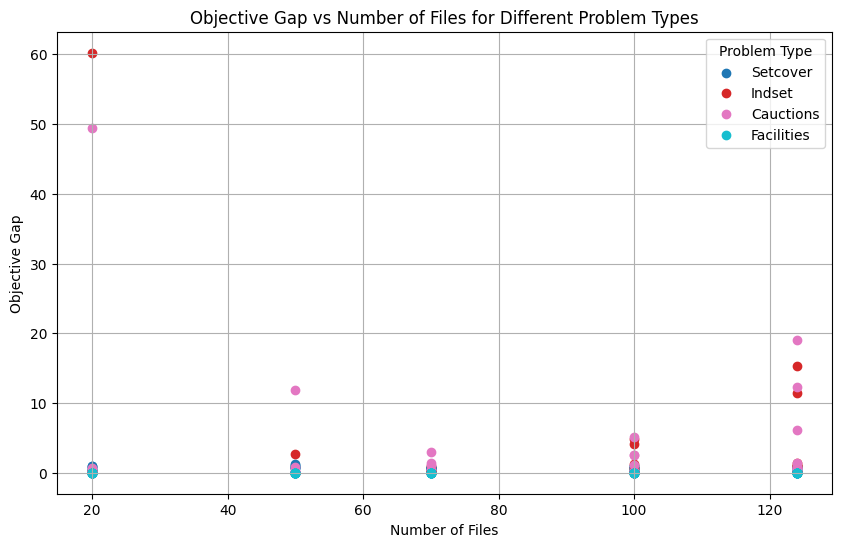

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('/home/ac/IPM_MPNN/results.csv')

# Filter the DataFrame to remove rows with obj_gap > 2000
#df_filtered = df[df['obj_gap'] <= 2000]
df_filtered = df
#df_filtered = df[(df['problem'] == 'Cauctions')] #& (df['obj_gap'] <= 2000)]

# Create a plot
plt.figure(figsize=(10, 6))

# Get unique problem types
problem_types = df_filtered['problem'].unique()

# Define a color map
colors = plt.cm.get_cmap('tab10', len(problem_types))

# Plot data for each problem type with different colors
for i, problem in enumerate(problem_types):
    problem_data = df_filtered[df_filtered['problem'] == problem]
    plt.scatter(problem_data['no_of_file'], problem_data['con_gap'], color=colors(i), label=problem)

# Add titles and labels
plt.title('Objective Gap vs Number of Files for Different Problem Types')
plt.xlabel('Number of Files')
plt.ylabel('Objective Gap')
plt.grid(True)
plt.legend(title="Problem Type")
plt.show()

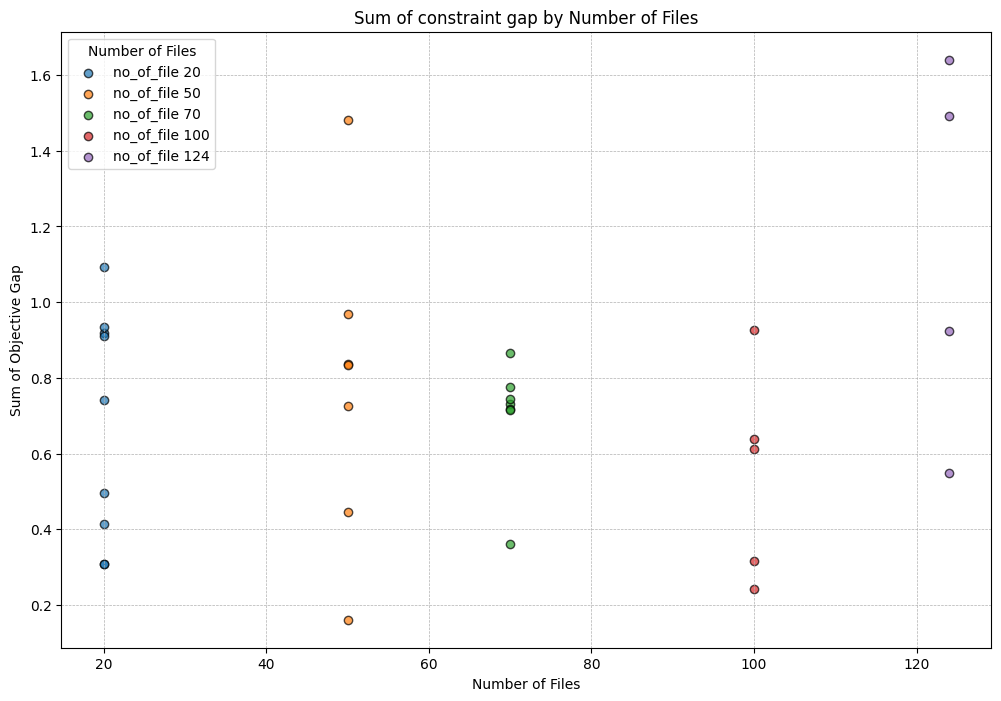

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
df = pd.read_csv('/home/ac/IPM_MPNN/results.csv')

# Step 1: Identify (no_of_file, run) combinations where any problem type has obj_gap > 100
invalid_runs = df[df['con_gap'] > 1][['no_of_file', 'run']].drop_duplicates()

# Get the list of (no_of_file, run) tuples to exclude
invalid_run_tuples = list(invalid_runs.itertuples(index=False, name=None))

# Step 2: Filter out these (no_of_file, run) combinations
df_filtered = df[~df[['no_of_file', 'run']].apply(tuple, axis=1).isin(invalid_run_tuples)]

# Step 3: Calculate the sum of obj_gap for each (no_of_file, run) combination
sum_obj_gap = df_filtered.groupby(['no_of_file', 'run'])['con_gap'].sum().reset_index()

# Step 4: Define a color map for no_of_file values
unique_no_of_files = sum_obj_gap['no_of_file'].unique()
color_map = plt.get_cmap('tab10', len(unique_no_of_files))

# Create a dictionary to map no_of_file to color
color_dict = {no_of_file: color_map(i) for i, no_of_file in enumerate(unique_no_of_files)}

# Step 5: Plot the results
plt.figure(figsize=(12, 8))

# Plot data with no_of_file on x-axis and sum of obj_gap on y-axis
for no_of_file in unique_no_of_files:
    file_data = sum_obj_gap[sum_obj_gap['no_of_file'] == no_of_file]
    plt.scatter(file_data['no_of_file'], file_data['con_gap'],  
                label=f'no_of_file {no_of_file}', 
                edgecolor='k', alpha=0.7)

# Add titles and labels
plt.title('Sum of constraint gap by Number of Files')
plt.xlabel('Number of Files')
plt.ylabel('Sum of Objective Gap')
plt.legend(title='Number of Files')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()